##Partie 1 :

Shape de l'image : (5, 5, 3)


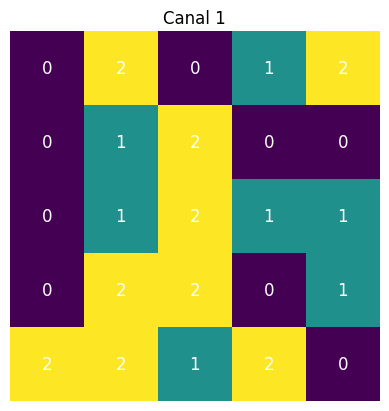

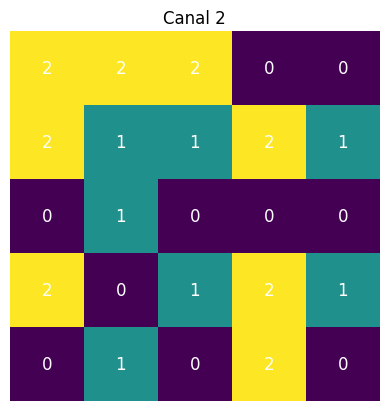

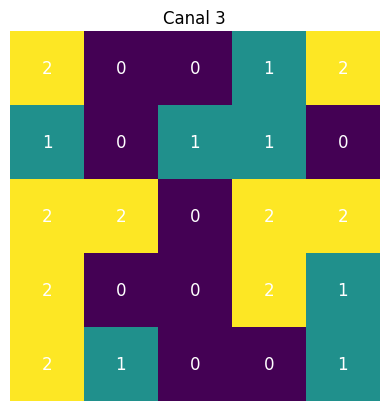

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Générer 3 canaux 5x5 avec valeurs entières 0, 1 ou 2
channel_1 = np.random.randint(0, 3, (5, 5))
channel_2 = np.random.randint(0, 3, (5, 5))
channel_3 = np.random.randint(0, 3, (5, 5))

# Combiner les 3 canaux en image 5x5x3
input_image = np.stack([channel_1, channel_2, channel_3], axis=-1)
print("Shape de l'image :", input_image.shape)

# Fonction pour afficher une matrice avec couleurs et chiffres
def show_matrix_with_values(matrix, title):
    plt.imshow(matrix, cmap='viridis', vmin=0, vmax=2)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='white', fontsize=12)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Afficher chaque canal
show_matrix_with_values(channel_1, "Canal 1")
show_matrix_with_values(channel_2, "Canal 2")
show_matrix_with_values(channel_3, "Canal 3")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

# Modèle simple : 1 seule couche de convolution
model1 = Sequential([
    Conv2D(filters=2,           # 2 filtres de sortie
           kernel_size=(3,3),   # taille 3x3
           activation=None,     # pas d'activation
           use_bias=True,      # pas de biais
           input_shape=(5,5,3)) # image d'entrée 5x5x3
])

# Résumé du modèle
model1.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# Créer manuellement 2 filtres 3x3x3 avec valeurs -1, 0 ou 1
filters = np.random.choice([-1, 0, 1], size=(3, 3, 3, 2)).astype(np.float32)

# Créer le biais : 1 valeur par filtre
bias = np.random.choice([-1, 0, 1], size=(2,)).astype(np.float32)

print("Shape des filtres :", filters.shape)  # (3, 3, 3, 2)
print("Shape du biais :", bias.shape)        # (2,)

# Visualiser chaque filtre (séparé par canal)
for i in range(2):
    print(f"\n=== Filtre {i+1} (3 canaux) ===")
    for c in range(3):
        print(f"Canal {c+1} :\n", filters[:, :, c, i])
print("\nBiais :", bias)

# Charger les filtres + biais dans le modèle
model1.layers[0].set_weights([filters, bias])


Shape des filtres : (3, 3, 3, 2)
Shape du biais : (2,)

=== Filtre 1 (3 canaux) ===
Canal 1 :
 [[-1.  1.  1.]
 [ 1. -1. -1.]
 [-1.  0. -1.]]
Canal 2 :
 [[-1.  1.  0.]
 [ 0.  1.  1.]
 [ 1. -1. -1.]]
Canal 3 :
 [[-1.  0.  0.]
 [ 0.  1. -1.]
 [ 1. -1.  0.]]

=== Filtre 2 (3 canaux) ===
Canal 1 :
 [[-1.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]]
Canal 2 :
 [[ 1.  1.  1.]
 [ 0.  0. -1.]
 [ 0. -1. -1.]]
Canal 3 :
 [[-1.  0. -1.]
 [-1.  1.  1.]
 [ 0.  1.  1.]]

Biais : [ 1. -1.]


Shape de la sortie : (1, 3, 3, 2)

Carte 1 :
 [[-4.  3.  3.]
 [ 3. -7. -8.]
 [-3. -3.  3.]]

Carte 2 :
 [[ 0.  3.  1.]
 [-5.  3.  5.]
 [-6. -6. -5.]]


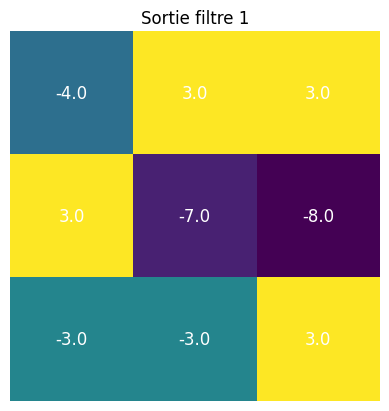

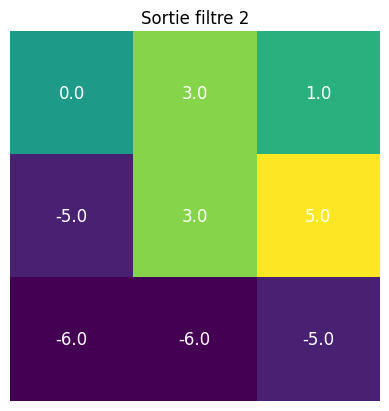

In [ ]:
# Préparer l'image pour le modèle : ajouter la dimension batch
input_image = np.expand_dims(input_image, axis=0)  # (1, 5, 5, 3)

# Appliquer la convolution
output_1 = model1(input_image)

print("Shape de la sortie :", output_1.shape)

# Récupérer les 2 cartes de caractéristiques (3x3)
feature_map_1 = output_1.numpy()[0, :, :, 0]
feature_map_2 = output_1.numpy()[0, :, :, 1]

print("\nCarte 1 :\n", feature_map_1)
print("\nCarte 2 :\n", feature_map_2)

# Fonction pour afficher une carte avec valeurs et couleurs
def show_feature_map(matrix, title):
    plt.imshow(matrix, cmap='viridis')  # couleur
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, f"{matrix[i,j]:.1f}", ha='center', va='center', color='white', fontsize=12)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Afficher les 2 cartes de sortie
show_feature_map(feature_map_1, "Sortie filtre 1")
show_feature_map(feature_map_2, "Sortie filtre 2")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# Modèle simple : 1 couche de convolution + max pooling
model2 = Sequential([
    Conv2D(filters=2,           # 2 filtres de sortie
           kernel_size=(3,3),   # taille 3x3
           activation=None,     # pas d'activation
           use_bias=True,       # biais activé
           input_shape=(5,5,3)), # image d'entrée 5x5x3
    MaxPooling2D(pool_size=(2,2))  # max pooling 2x2
])

# Résumé du modèle
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# Créer manuellement 2 filtres 3x3x3 avec valeurs -1, 0 ou 1
filters = np.random.choice([-1, 0, 1], size=(3, 3, 3, 2)).astype(np.float32)

# Créer le biais : 1 valeur par filtre
bias = np.random.choice([-1, 0, 1], size=(2,)).astype(np.float32)

print("Shape des filtres :", filters.shape)  # (3, 3, 3, 2)
print("Shape du biais :", bias.shape)        # (2,)

# Visualiser chaque filtre (séparé par canal)
for i in range(2):
    print(f"\n=== Filtre {i+1} (3 canaux) ===")
    for c in range(3):
        print(f"Canal {c+1} :\n", filters[:, :, c, i])
print("\nBiais :", bias)

# Charger les filtres + biais dans le modèle
model2.layers[0].set_weights([filters, bias])


Shape des filtres : (3, 3, 3, 2)
Shape du biais : (2,)

=== Filtre 1 (3 canaux) ===
Canal 1 :
 [[ 0. -1.  0.]
 [ 0.  1. -1.]
 [ 0.  0. -1.]]
Canal 2 :
 [[-1.  0.  1.]
 [-1.  1.  0.]
 [-1. -1.  1.]]
Canal 3 :
 [[ 0.  0.  1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]]

=== Filtre 2 (3 canaux) ===
Canal 1 :
 [[ 0.  1.  1.]
 [ 0.  0.  0.]
 [-1.  0.  1.]]
Canal 2 :
 [[-1.  1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
Canal 3 :
 [[ 0.  1.  1.]
 [ 0.  0.  0.]
 [ 1.  0. -1.]]

Biais : [-1.  0.]


Shape de la sortie : (1, 1, 1, 2)

Carte 1 :
 [[-2.]]

Carte 2 :
 [[12.]]


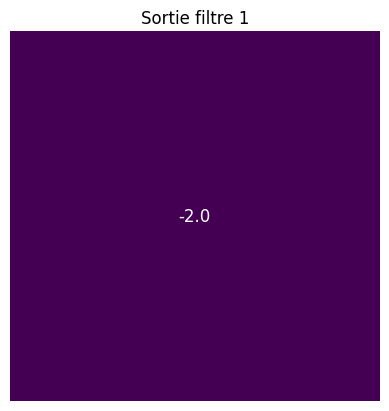

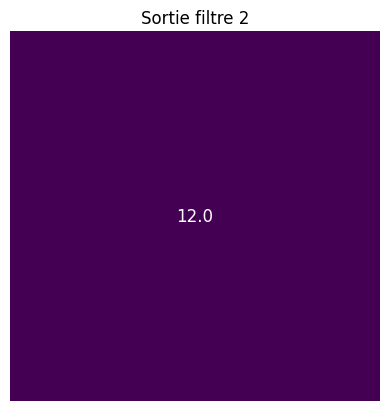

In [ ]:
# Appliquer la convolution
output_2 = model2(input_image)

print("Shape de la sortie :", output_2.shape)

# Récupérer les 2 cartes de caractéristiques (3x3)
feature_map_1 = output_2.numpy()[0, :, :, 0]
feature_map_2 = output_2.numpy()[0, :, :, 1]

print("\nCarte 1 :\n", feature_map_1)
print("\nCarte 2 :\n", feature_map_2)

# Fonction pour afficher une carte avec valeurs et couleurs
def show_feature_map(matrix, title):
    plt.imshow(matrix, cmap='viridis')  # couleur
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, f"{matrix[i,j]:.1f}", ha='center', va='center', color='white', fontsize=12)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Afficher les 2 cartes de sortie
show_feature_map(feature_map_1, "Sortie filtre 1")
show_feature_map(feature_map_2, "Sortie filtre 2")

##Partie 2 :

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Charger MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliser les pixels (0-255 → 0-1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Ajouter la dimension canal
x_train = x_train[..., tf.newaxis]  # shape (num_samples, 28,28,1)
x_test  = x_test[..., tf.newaxis]

# One-hot encoder les labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)


x_train shape : (60000, 28, 28, 1)
y_train shape : (60000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.8185 - loss: 0.6133 - val_accuracy: 0.9773 - val_loss: 0.0823
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.9750 - loss: 0.0822 - val_accuracy: 0.9842 - val_loss: 0.0566
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9830 - loss: 0.0551 - val_accuracy: 0.9882 - val_loss: 0.0448
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9867 - loss: 0.0430 - val_accuracy: 0.9870 - val_loss: 0.0471
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9890 - val_loss: 0.0359
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9925 - loss: 0.0250 - val_accuracy: 0.9885 - val_loss: 0.0365
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9925 - loss: 0.0220 - val_accuracy: 0.9907 - val_loss: 0.0330
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9946 - loss: 0.0179 - 

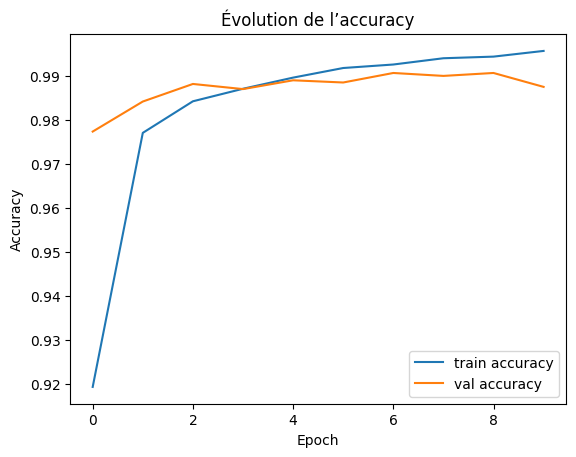

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Évolution de l’accuracy')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy sur le test set :", test_acc)


Accuracy sur le test set : 0.9878000020980835


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Charger Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normaliser les pixels (0-255 → 0-1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Ajouter la dimension canal pour Keras (28x28x1)
x_train = x_train[..., tf.newaxis]
x_test  = x_test[..., tf.newaxis]

# One-hot encoder les labels (10 classes)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)


x_train shape : (60000, 28, 28, 1)
y_train shape : (60000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN : Conv → Pool → Conv → Pool → Flatten → Dense → Dense
model_fmnist = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model_fmnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model_fmnist.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_fmnist = model_fmnist.fit(x_train, y_train,
                                   validation_split=0.1,
                                   epochs=10,
                                   batch_size=128)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.6952 - loss: 0.9161 - val_accuracy: 0.8502 - val_loss: 0.4250
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.8579 - loss: 0.3963 - val_accuracy: 0.8717 - val_loss: 0.3577
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.8748 - loss: 0.3511 - val_accuracy: 0.8790 - val_loss: 0.3314
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.8858 - loss: 0.3182 - val_accuracy: 0.8947 - val_loss: 0.2959
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.8951 - loss: 0.2907 - val_accuracy: 0.8912 - val_loss: 0.3004
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - accuracy: 0.9002 - loss: 0.2730 - val_accuracy: 0.8938 - val_loss: 0.2922
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9041 - loss: 0.2566 - val_accuracy: 0.8827 - val_loss: 0.3121
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9095 - loss: 0.2449 - 

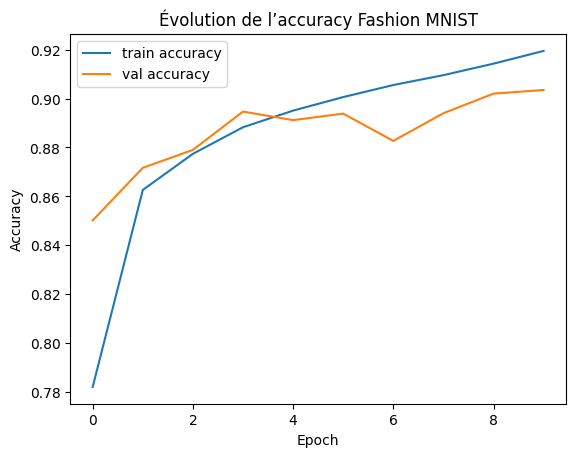

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_fmnist.history['accuracy'], label='train accuracy')
plt.plot(history_fmnist.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Évolution de l’accuracy Fashion MNIST')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model_fmnist.evaluate(x_test, y_test)
print("Test accuracy Fashion MNIST :", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9049 - loss: 0.2901
Test accuracy Fashion MNIST : 0.902400016784668


In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Fonction pour afficher les activations des couches d'un modèle
def plot_activations(model, image, title_prefix=""):
    """
    Affiche les activations des couches Conv2D et MaxPooling2D d'un modèle pour une image donnée.

    model : modèle Keras entraîné
    image : image 28x28
    title_prefix : texte ajouté au titre des plots
    """
    # S'assurer que l'image a la bonne forme pour prédiction
    input_image = image.reshape(1, 28, 28, 1)

    # Créer un input tensor
    input_tensor = tf.keras.Input(shape=(28,28,1))

    # Passer le tensor à travers les couches du modèle
    x = input_tensor
    layer_outputs = []
    layer_names = []

    for layer in model.layers:
        x = layer(x)
        if 'conv' in layer.name or 'max_pool' in layer.name or 'maxpool' in layer.name:
            layer_outputs.append(x)
            layer_names.append(layer.name)

    # Modèle qui renvoie les activations des couches sélectionnées
    activation_model = Model(inputs=input_tensor, outputs=layer_outputs)

    # Prédire les activations
    activations = activation_model.predict(input_image)

    # Afficher les activations
    if len(layer_names) == 1:
        activations = [activations]

    for layer_name, activation in zip(layer_names, activations):
        print(f"Activations de la couche {layer_name} : {activation.shape}")
        num_filters = activation.shape[-1]
        cols = min(num_filters, 8)
        rows = (num_filters + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
        axes = axes.flatten()

        for i in range(num_filters):
            axes[i].imshow(activation[0,:,:,i], cmap='viridis')
            axes[i].set_title(f'Filtre {i+1}')
            axes[i].axis('off')

        for j in range(num_filters, len(axes)):
            axes[j].axis('off')

        plt.suptitle(f'{title_prefix} Activations couche {layer_name}')
        plt.tight_layout()
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Activations de la couche conv2d_14 : (1, 26, 26, 16)


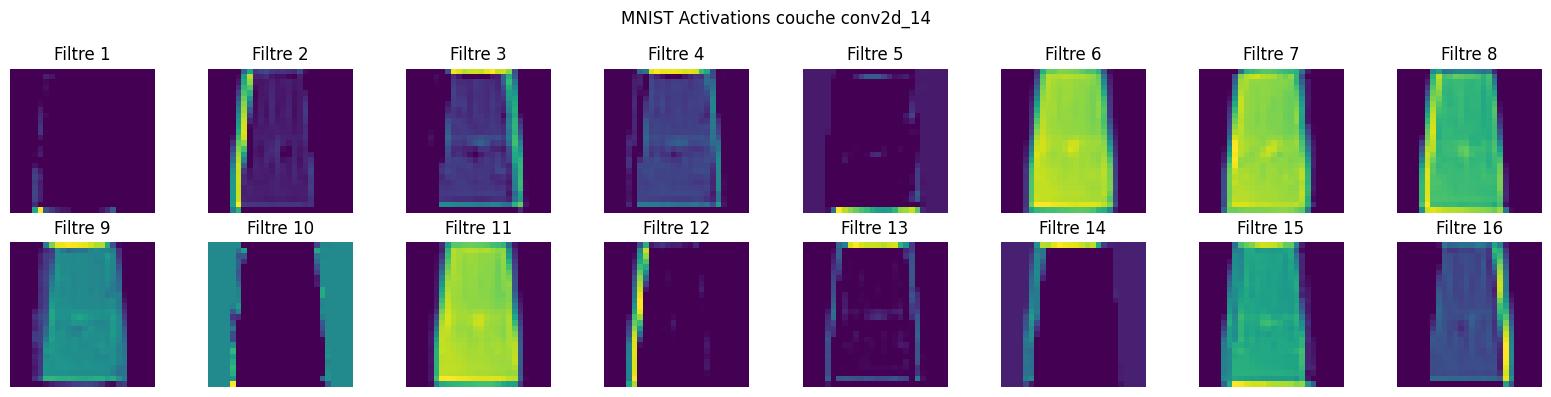

Activations de la couche max_pooling2d_3 : (1, 13, 13, 16)


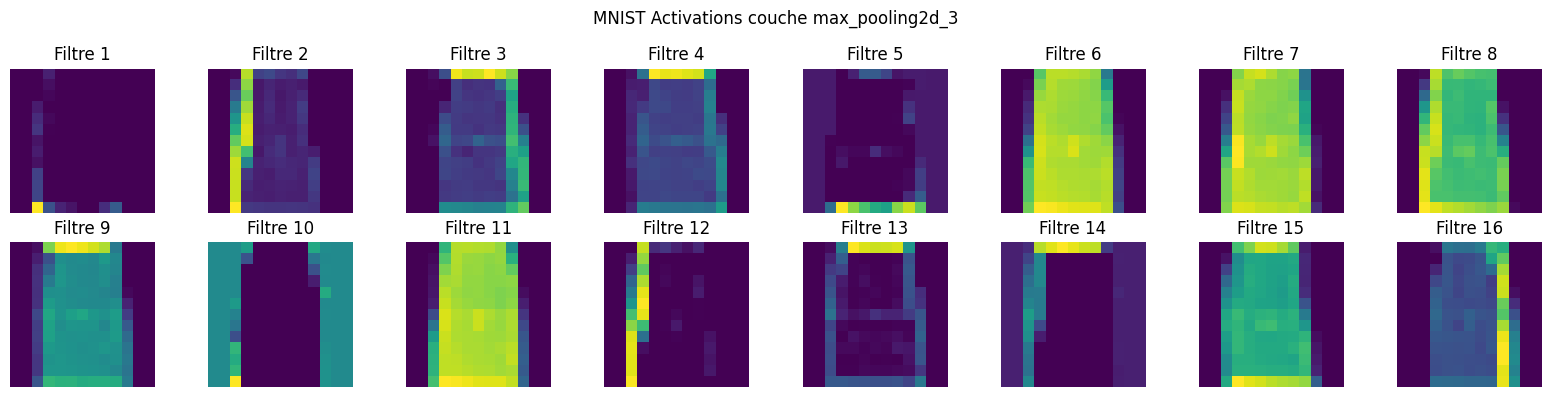

Activations de la couche conv2d_15 : (1, 11, 11, 32)


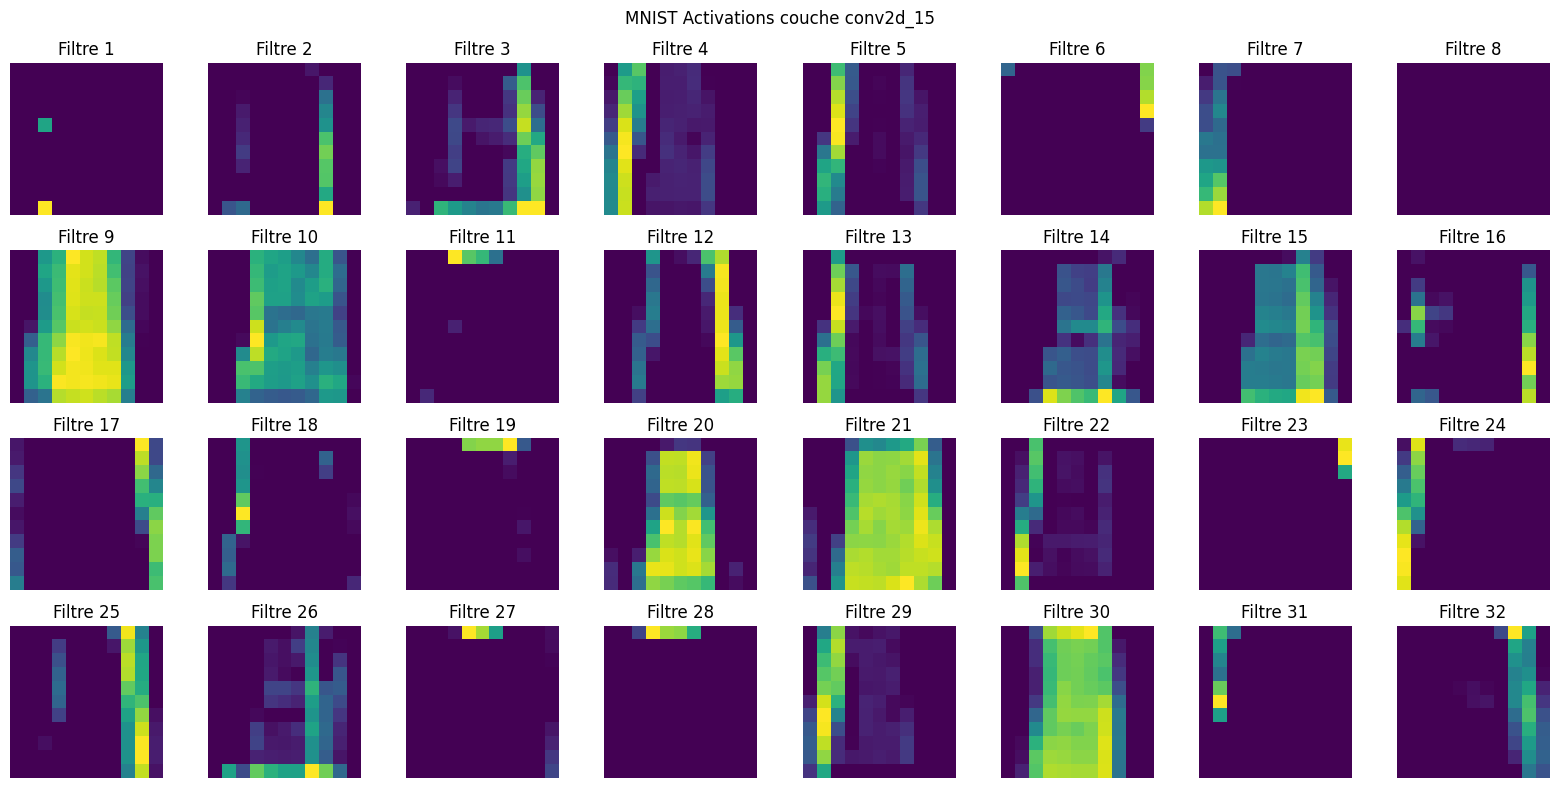

Activations de la couche max_pooling2d_4 : (1, 5, 5, 32)


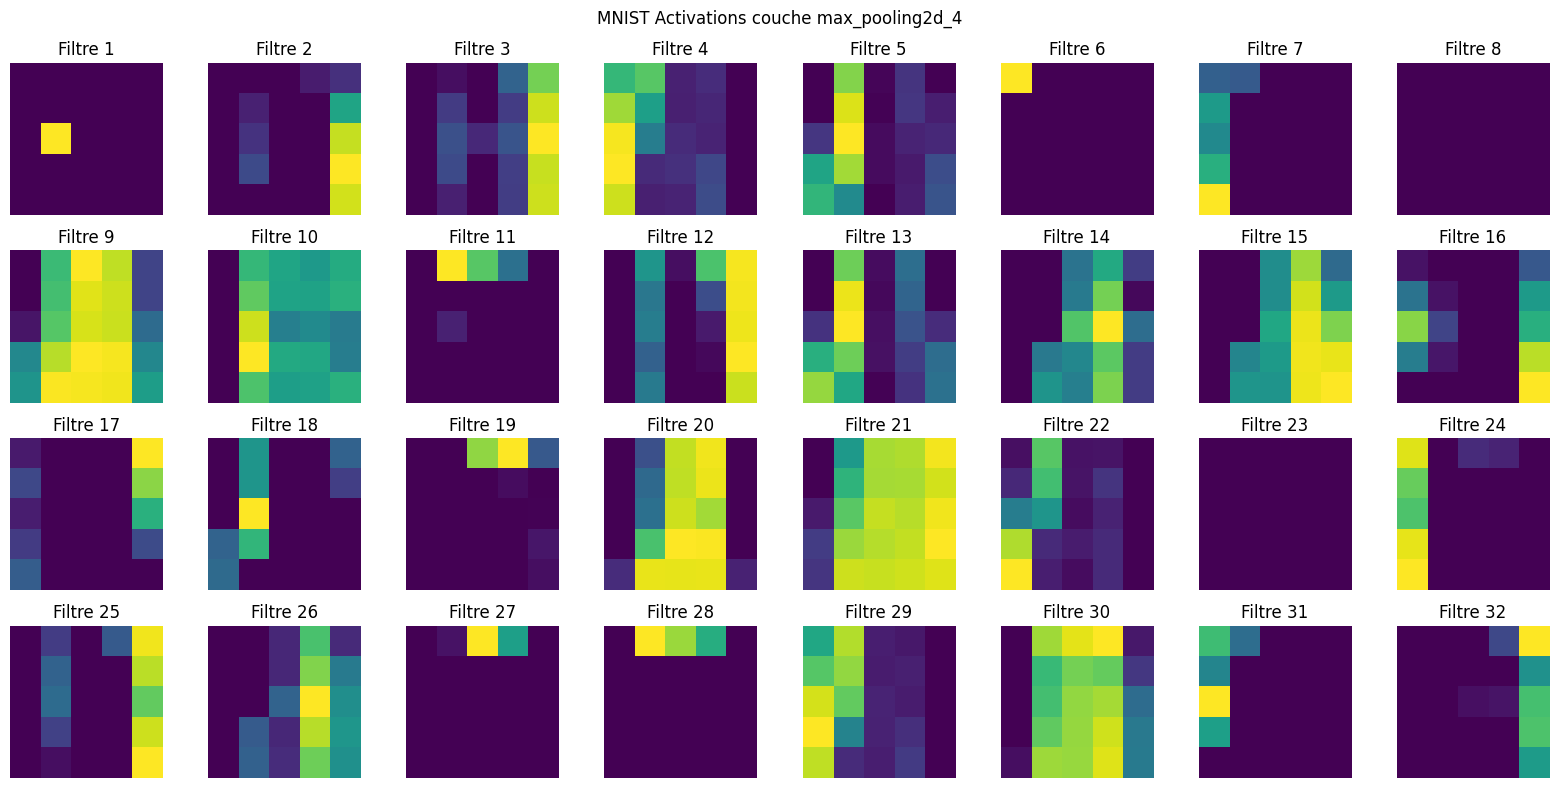

In [ ]:
# Sélectionner une image de test MNIST
random_index = 42
image = x_test[random_index]  # x_test = MNIST test set

# Visualiser les activations
plot_activations(model, image, title_prefix="MNIST")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Activations de la couche conv2d_16 : (1, 26, 26, 16)


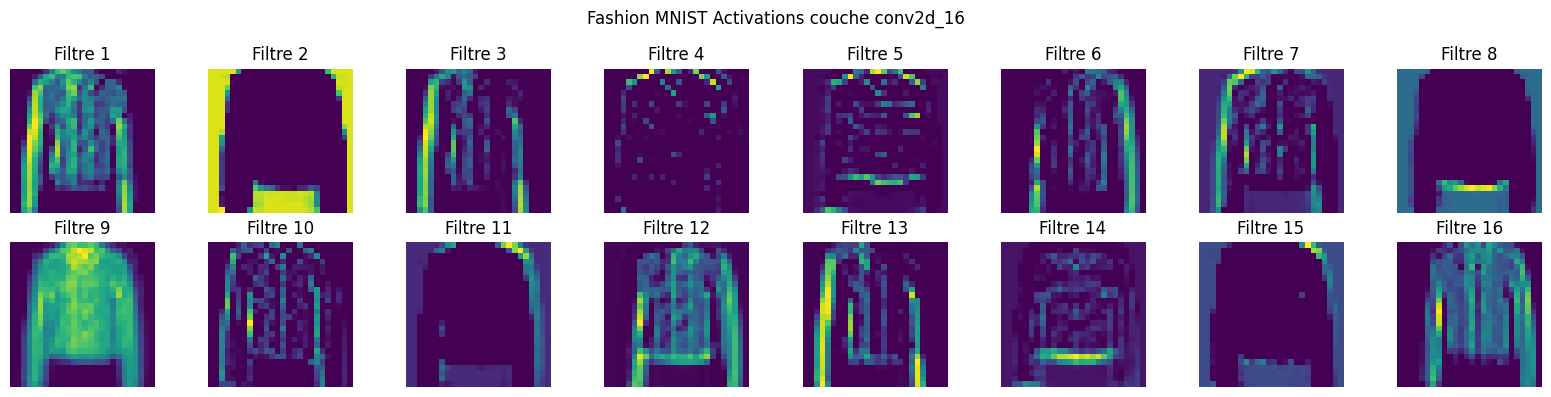

Activations de la couche max_pooling2d_5 : (1, 13, 13, 16)


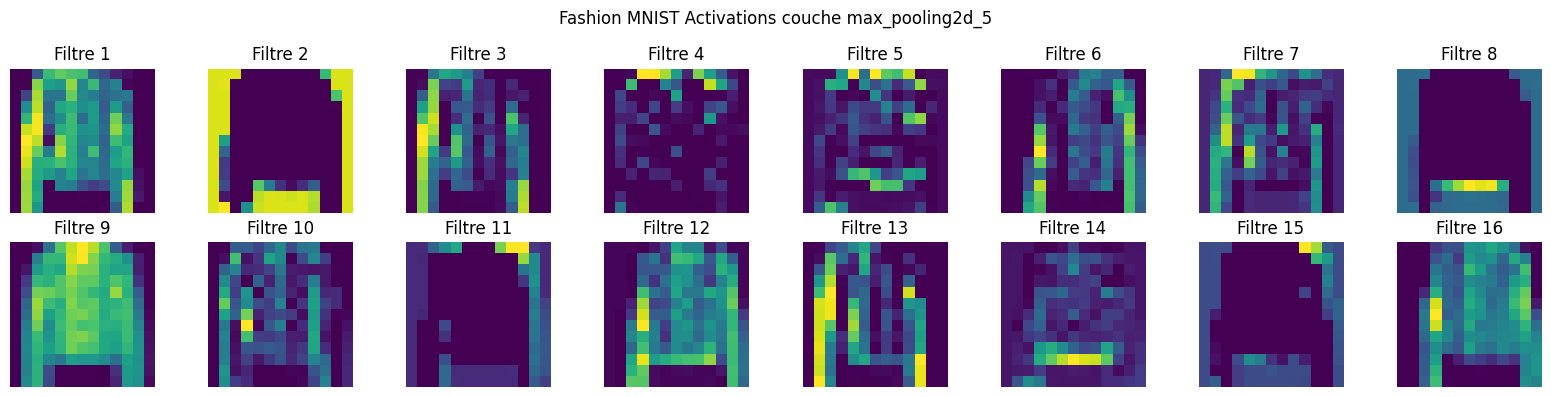

Activations de la couche conv2d_17 : (1, 11, 11, 32)


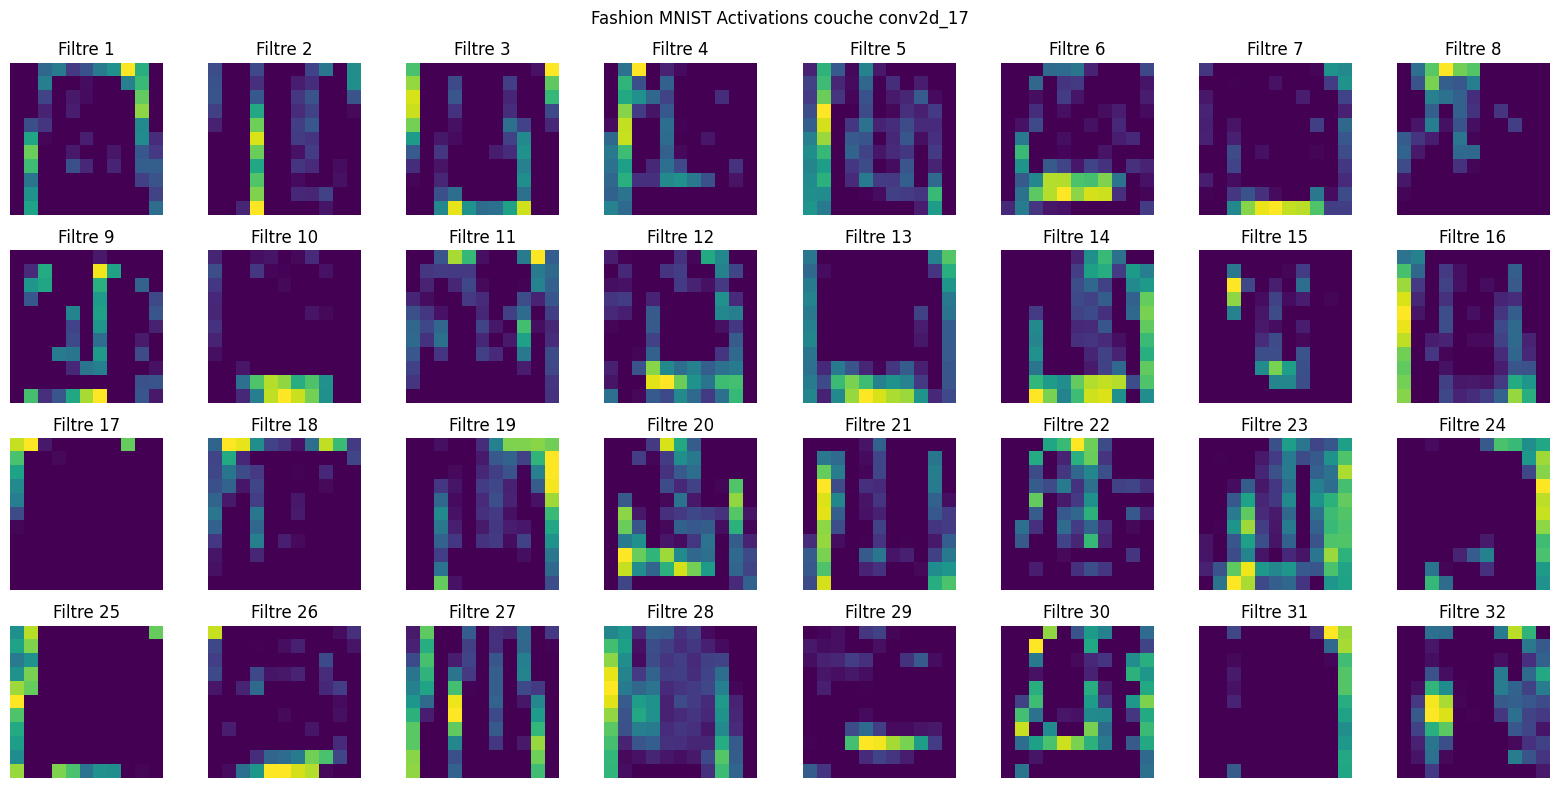

Activations de la couche max_pooling2d_6 : (1, 5, 5, 32)


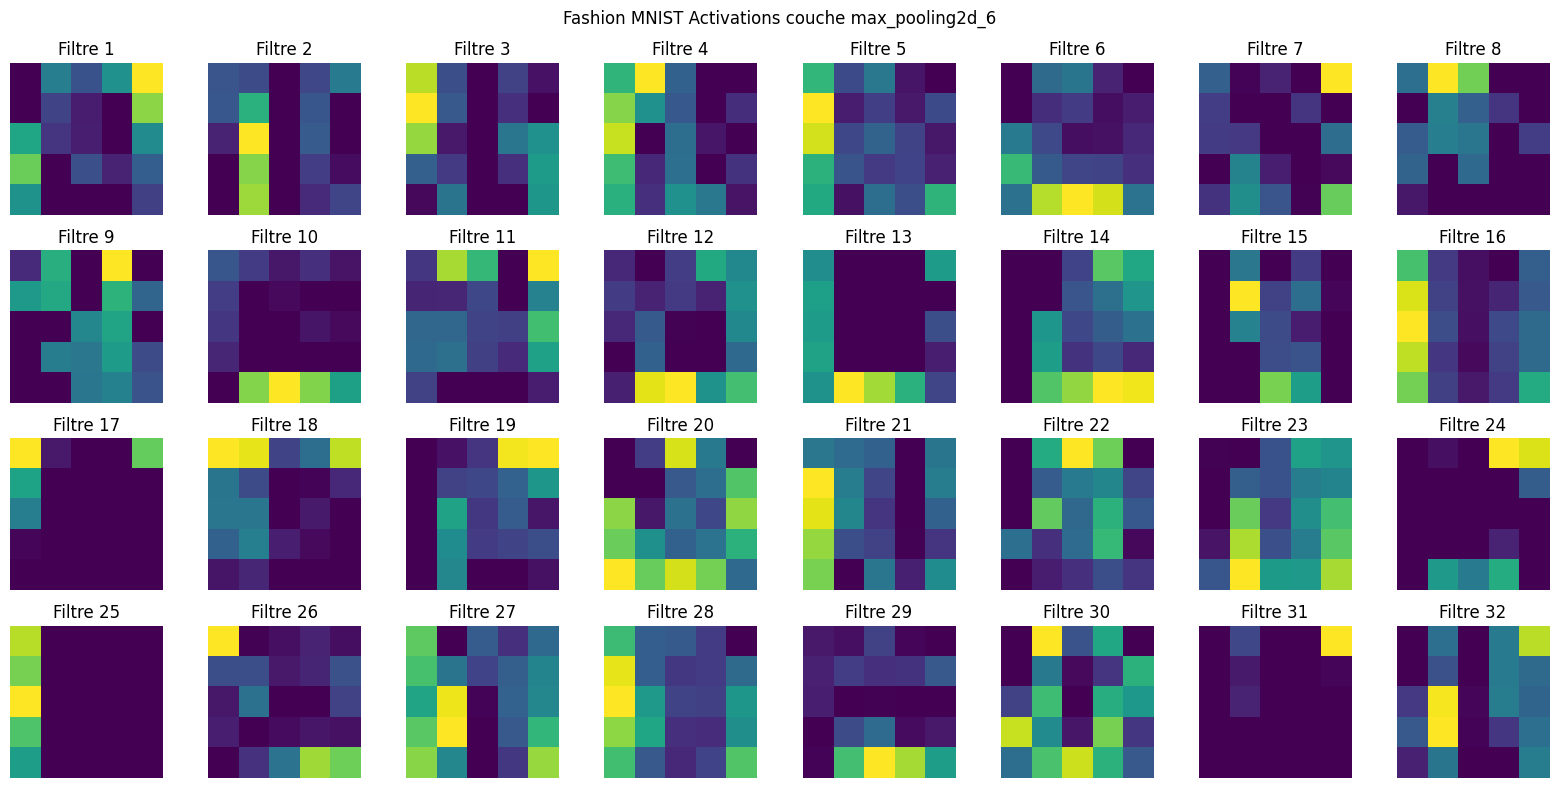

In [ ]:
# Sélectionner une image de test Fashion MNIST
random_index = 10
image = x_test[random_index]  # x_test = Fashion MNIST test set

# Visualiser les activations
plot_activations(model_fmnist, image, title_prefix="Fashion MNIST")
